In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
#dt = 0.005 * np.sqrt(4.86)
#dz=0.0625 / 91. 
dz = 0.002
dt = 0.00004
z=1.
t = 0.2
Nz = z / dz
Nt = 2 * t / dt
c = 3. * 10** (8) # м/с

In [18]:
def eval_b1():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))

    beta1 = (B1 * w**2 * w1**2)/(c* (-w**2 + w1**2)**2 * np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))) + np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))/c
    return beta1

def eval_b2():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))
    B2 = 0.4079426
    w2 = (2 * np.pi * c)/(0.1162414*10**(-6))
    beta2 = (w * ((2 * B1 * w * w1**2)/(-w**2 + w1**2)**2 + (2 * B2 * w * w2 **2)/(-w**2 + w2**2)**2))/(2 * c * np.sqrt(1 + (B1 * w1**2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))) + np.sqrt(1 + (B1* w1** 2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))/c
    return beta2

beta1 = eval_b1()
beta2 = eval_b2()
beta1 = beta1 * 10 ** 9
beta2 = beta2 * 10 ** 9
print(beta1, beta2)


4.353821341267787 4.865877335533778


In [19]:
T0=0.05
def impulse1(t):
    return  np.e ** (-1. * t ** 2 / (2. * T0 ** 2))

In [20]:
z_array = np.arange(-z/2., z/2., dz)
t_array = np.arange(0, t, dt)

In [21]:
q = np.zeros((len(z_array), len(t_array)), dtype=complex)

first_layer = []
for t_i in t_array:
    res = impulse1(t_i)
    first_layer.append(res)
q[0] = first_layer

In [22]:
beta2 = 4.86
gamma = 10.

In [23]:
q = np.zeros((len(t_array), len(z_array)), dtype=complex)

first_layer = []
for t_i in z_array:
    res = impulse1(t_i)
    first_layer.append(res)
q[0] = first_layer

In [24]:
lamda = dt / (2.* dz ** 2)
ln = len(z_array)
A = np.zeros((ln, ln), dtype=complex)
for i in range(0, ln):
    A[i][i] = lamda + 1j

for i in range(0, ln):
    A[i][((ln + i - 1)) % ln] = - lamda / 2.
    A[i][((ln + i + 1)) % ln] = - lamda / 2.



In [25]:
lamda

5.000000000000001

In [26]:
len(t_array)

5000

In [27]:
len(z_array)

500

In [28]:
q[0].shape

(500,)

In [29]:
inverse_matrix = np.linalg.inv(A)

for i in range(0, 140):
    F = np.zeros((len(z_array), ), dtype=complex)
    for k in range(0, 20):
        for j in range(0, len(z_array)):

            # r = q[m+1][j]
            if k != 0:
                r = q[i + 1][j]
            else :
                r = q[i][j]
                
            if (j == 0):
                F[j] = lamda/2 * (q[i][j + 1] + 0) + (1j - lamda) * q[i][j] + beta2 * 500. * dt * ((abs(r) ** 2) * r + (abs(q[i][j] ** 2) * q[i][j]))
                                                                                    
            if (j == len(z_array) - 1):
                F[j] = lamda/2 * (0 + q[i][j - 1]) + (1j - lamda) * q[i][j] + beta2* 500. * dt * ((abs(r) ** 2) * r + (abs(q[i][j] ** 2) * q[i][j]))

            if j > 0  and j < len(z_array) - 1:
                F[j] = lamda/2 * (q[i][j + 1] + q[i][j - 1]) + (1j - lamda) * q[i][j] + beta2 * 500. * dt * ((abs(r) ** 2) * r + (abs(q[i][j] ** 2) * q[i][j]))

        
            new_layer = inverse_matrix @ F
            q[i + 1] = new_layer    

    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


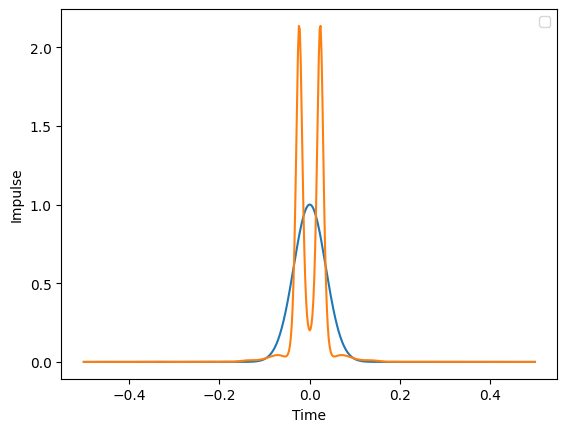

In [30]:
graph1 = []
for q_i in q[0]:
    graph1.append(abs(q_i)**2)

graph2 = []
for q_i in q[135]:
    graph2.append(abs(q_i) ** 2)  


plt.plot(z_array, graph1)
plt.plot(z_array, graph2)

#plt.scatter(t, impulse3)
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()

In [31]:
print(1/beta2, 29900 * dz)

0.20576131687242796 59.800000000000004
